In [1]:
import json
import os
import matplotlib.pyplot as plt

In [6]:
import json
import numpy as np

# Load the JSON data
with open('/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_median_fixed/movies/median_movies_results_10_buckets_50_iterations.json', 'r') as file:
    data = json.load(file)

# Initialize a dictionary to store average uncertainties for each class in each bucket
average_uncertainties = {}

# Process each bucket
for bucket_name, experiments in data.items():
    if bucket_name == "1_buckets": continue
    class_uncertainties = {}
    
    # Process each experiment in the bucket
    for experiment in experiments:
        uncertainties = experiment.get("Uncertainties", {})
        
        for class_name, values in uncertainties.items():
            if values:  # Check if there are any uncertainty values
                lowest_uncertainty = values[0]  # Take the top1 lowest uncertainty (index 0)
                
                if class_name not in class_uncertainties:
                    class_uncertainties[class_name] = []
                
                class_uncertainties[class_name].append(lowest_uncertainty)
    
    # Compute the average uncertainty for each class in this bucket
    average_uncertainties[bucket_name] = {class_name: np.mean(uncertainties) 
                                          for class_name, uncertainties in class_uncertainties.items()}

average_uncertainties

{'2_buckets': {'class0': 0.49502702057361603, 'class1': 0.4997750675678253},
 '3_buckets': {'class0': 0.2104607653617859,
  'class1': 0.191115363240242,
  'class2': 0.2010273340344429},
 '4_buckets': {'class0': 0.11297867745161057,
  'class1': 0.0697207436338067,
  'class2': 0.0697207436338067,
  'class3': 0.06996279958635569},
 '5_buckets': {'class0': 0.05216723211109638,
  'class1': 0.027962948689237238,
  'class2': 0.027962948689237238,
  'class3': 0.027962948689237238,
  'class4': 0.028079949850216508},
 '6_buckets': {'class0': 0.02323289792984724,
  'class1': 0.015844789615948686,
  'class2': 0.015844789615948686,
  'class3': 0.015844789615948686,
  'class4': 0.015844789615948686,
  'class5': 0.019492617773939857},
 '7_buckets': {'class0': 0.014939040029421449,
  'class1': 0.011943019712343812,
  'class2': 0.01194077662192285,
  'class3': 0.01194077662192285,
  'class4': 0.01194077662192285,
  'class5': 0.0122627108450979,
  'class6': 0.018377885427325963},
 '8_buckets': {'class0'

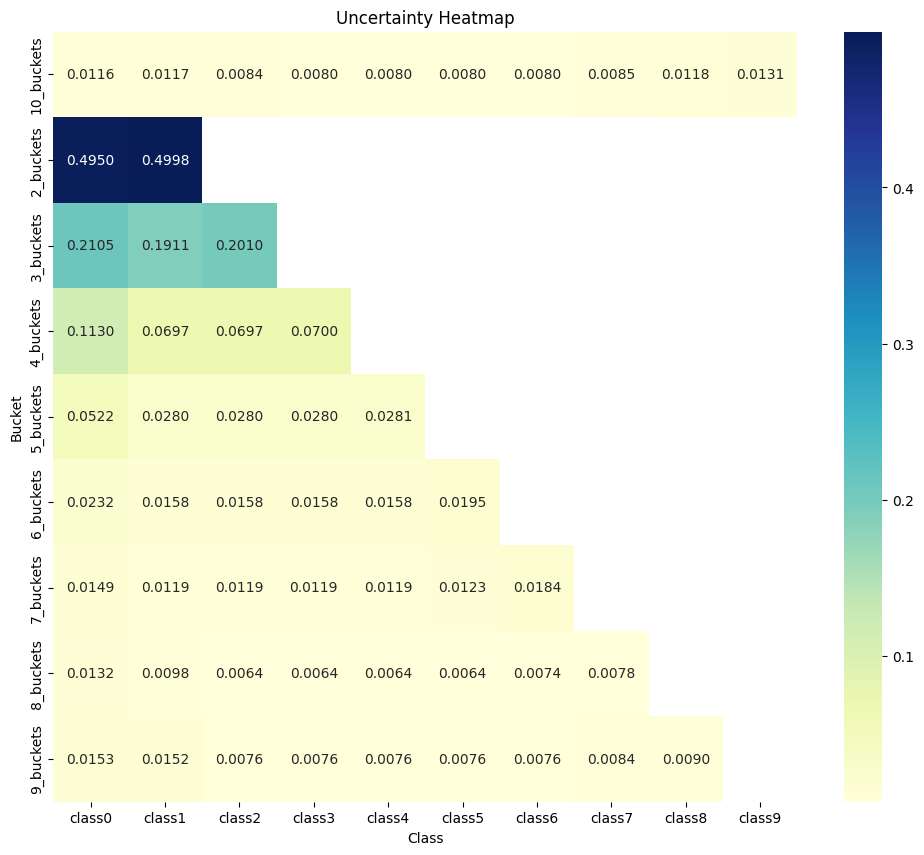

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the average uncertainties dictionary to a DataFrame for easier plotting
data_dict = {
    'Bucket': [],
    'Class': [],
    'Average Uncertainty': []
}

for bucket, class_uncertainties in average_uncertainties.items():
    for class_name, avg_uncertainty in class_uncertainties.items():
        data_dict['Bucket'].append(bucket)
        data_dict['Class'].append(class_name)
        data_dict['Average Uncertainty'].append(avg_uncertainty)

df = pd.DataFrame(data_dict)

# Create a pivot table for the heatmap
heatmap_data = df.pivot("Bucket", "Class", "Average Uncertainty")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Uncertainty Heatmap")
plt.xlabel("Class")
plt.ylabel("Bucket")
plt.show()

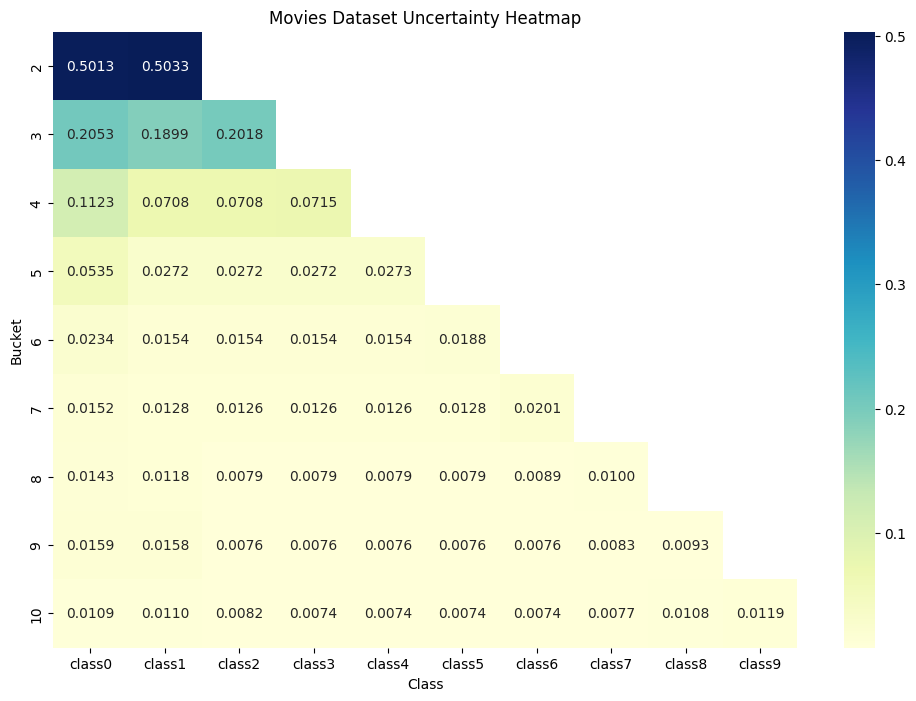

In [15]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the JSON files
file_paths = [
    "/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_median_fixed/movies/median_movies_results_10_buckets_50_iterations.json",
    "/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_mean_fixed/movies/mean_movies_results_10_buckets_50_iterations.json"
]

data_list = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        data_list.append(json.load(file))

# Function to extract top 1 lowest uncertainty values and compute averages for each class in each bucket
def compute_average_uncertainties(data):
    average_uncertainties = {}
    for bucket_key, experiments in data.items():
        bucket = bucket_key.split('_')[0]
        if bucket not in average_uncertainties:
            average_uncertainties[bucket] = {}
        
        for experiment in experiments:
            for class_name, uncertainties in experiment["Uncertainties"].items():
                if uncertainties:
                    top1_uncertainty = uncertainties[0]
                    if class_name not in average_uncertainties[bucket]:
                        average_uncertainties[bucket][class_name] = []
                    average_uncertainties[bucket][class_name].append(top1_uncertainty)
    
    # Compute the average uncertainties
    for bucket in average_uncertainties:
        for class_name in average_uncertainties[bucket]:
            uncertainties = average_uncertainties[bucket][class_name]
            average_uncertainties[bucket][class_name] = sum(uncertainties) / len(uncertainties) if uncertainties else 0.0
    
    return average_uncertainties

# Compute average uncertainties for each JSON file
average_uncertainties_list = [compute_average_uncertainties(data) for data in data_list]

# Combine the results by averaging them
combined_uncertainties = {}

for avg_uncertainties in average_uncertainties_list:
    for bucket, class_uncertainties in avg_uncertainties.items():
        if bucket not in combined_uncertainties:
            combined_uncertainties[bucket] = {}
        
        for class_name, avg_uncertainty in class_uncertainties.items():
            if class_name not in combined_uncertainties[bucket]:
                combined_uncertainties[bucket][class_name] = []
            combined_uncertainties[bucket][class_name].append(avg_uncertainty)

# Calculate the final average uncertainties
for bucket in combined_uncertainties:
    for class_name in combined_uncertainties[bucket]:
        combined_uncertainties[bucket][class_name] = sum(combined_uncertainties[bucket][class_name]) / len(combined_uncertainties[bucket][class_name])

# Convert the combined uncertainties to a DataFrame for easier plotting
data_dict = {
    'Bucket': [],
    'Class': [],
    'Average Uncertainty': []
}

for bucket, class_uncertainties in combined_uncertainties.items():
    for class_name, avg_uncertainty in class_uncertainties.items():
        data_dict['Bucket'].append(bucket)
        data_dict['Class'].append(class_name)
        data_dict['Average Uncertainty'].append(avg_uncertainty)

df_combined = pd.DataFrame(data_dict)

# Ensure the buckets are sorted correctly
df_combined['Bucket'] = df_combined['Bucket'].astype(int)
df_combined.sort_values('Bucket', inplace=True)

# Create a pivot table for the heatmap
heatmap_data_combined = df_combined.pivot("Bucket", "Class", "Average Uncertainty")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_combined, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Movies Dataset Uncertainty Heatmap")
plt.xlabel("Class")
plt.ylabel("Bucket")
plt.show()